In [1]:
# !brew install libmagic

In [2]:
# %pip install langchain langchain-community unstructured python-magic "unstructured[md]" langchain-chroma

In [3]:
# %pip install --upgrade chromadb==0.4.14

In [4]:
import langchain

In [5]:
from langchain.document_loaders import DirectoryLoader

DATA_PATH = 'data'

def load_documents():
    # global DATA_PATH
    loader = DirectoryLoader(DATA_PATH, glob='*.md')
    documents = loader.load()
    return documents

documents = load_documents()

In [6]:
# CHUNKING -> each chunk more focsed to a particular area

from langchain_text_splitters.character import RecursiveCharacterTextSplitter

text_splitter = RecursiveCharacterTextSplitter(
    chunk_size=1000,
    chunk_overlap=500, # in characters
    length_function=len,
    add_start_index=True
)

chunks = text_splitter.split_documents(documents)

print(f'Split {len(documents)} docs into {len(chunks)} chunks.')

doc = chunks[10] # checking random chunk

print(doc.page_content)
print(doc.metadata)

Split 2 docs into 1236 chunks.
several slender ligatures across my body, from my arm-pits to my thighs. I could only look upwards; the sun began to grow hot, and the light offended my eyes. I heard a confused noise about me; but in the posture I lay, could see nothing except the sky. In a little time, I felt something alive moving on my left leg, which advancing gently forward over my breast, came almost up to my chin; when, bending my eyes downwards as much as I could, I perceived it to be a human creature not six inches high, with a bow and an arrow in his hands and a quiver at his back. In the meantime I felt at least forty more of the same kind (as I conjectured) following the first. I was in the utmost astonishment, and roared so loud that they all ran back in a fright, and some of them, as I was afterwards told, were hurt by the falls they got by leaping from my sides upon the ground. However, they soon returned, and one of them who ventured so far as to get a full sight of my fa

In [7]:
%pip install -qU langchain-openai

Note: you may need to restart the kernel to use updated packages.


In [8]:
# # TO CLEAR OUT THE DATABASE - > USE THIS
# import shutil
# import os

# CHROMA_PATH = 'chroma'

# if os.path.exists(CHROMA_PATH):
#     shutil.rmtree(CHROMA_PATH)


In [10]:
# to query each chunk, we need to turn all these chunks into a database
# chroma db
from dotenv import load_dotenv
import os
from langchain_chroma import Chroma
from langchain_openai import OpenAIEmbeddings

load_dotenv()
# chroma is the db used to store these chunks

CHROMA_PATH = 'chroma'

db = Chroma.from_documents(
    chunks,
    OpenAIEmbeddings(api_key=os.getenv('OPENAI_API_KEY')),
    persist_directory=CHROMA_PATH
)

# db.persist()
print(f'Saved {len(chunks)} chunks to \'{CHROMA_PATH}\'')
# chroma -> uses vector embedding as the key

# we are using the openai embeddings function to generate the vector embeddings for each chunk

# chroma path as the persistent directory, so u can get a folder on local disk to load the data later on



Saved 1236 chunks to 'chroma'


In [11]:
# UNDERSTANDING VECTOR EMBEDDINGS

embedding_function = OpenAIEmbeddings()

vector = embedding_function.embed_query('apple')

In [12]:
print(vector)
print(len(vector))
# string -> Vector to perform mathematical operations on it according to use
# we can now compare the embedding distance of 2 vectors to calculate similarity  

[0.007754413411021233, -0.02315402403473854, -0.007501848973333836, -0.027768446132540703, -0.004570052493363619, 0.012996833771467209, -0.022020895034074783, -0.008409716188907623, 0.018935512751340866, -0.02962513640522957, -0.0029403287917375565, 0.020164204761385918, -0.004402813967317343, 0.009099149145185947, -0.021693244576454163, 0.002051233546808362, 0.03069000318646431, 0.00010303096496500075, 0.0020119836553931236, -0.025461234152317047, -0.021078897640109062, -0.008163977414369583, 0.021324636414647102, -0.012484878301620483, 0.0011339805787429214, 0.005088833626359701, 0.010143537074327469, 8.90055307536386e-05, 0.015959346666932106, -0.012949051335453987, 0.02058742195367813, -0.016109520569443703, -0.01845768839120865, 0.00546085461974144, -0.019290467724204063, -0.009194714017212391, -0.012054836377501488, -0.00872371532022953, -0.0056690494529902935, -0.006122983060777187, 0.010512145236134529, 0.007658848538994789, -0.006385786924511194, 0.000720576848834753, -0.02326

In [13]:
from langchain.evaluation import load_evaluator

evalulator = load_evaluator('pairwise_embedding_distance')

In [14]:
# these are not similar in terms of the letters used but as a context
# for example apple and orange are similar because both are fruits
# apple and iphone are similar bcz both are related via a brand

x = evalulator.evaluate_string_pairs(prediction='apple', prediction_b='beach')
y = evalulator.evaluate_string_pairs(prediction='apple', prediction_b='orange')
z = evalulator.evaluate_string_pairs(prediction='apple', prediction_b='apples')
w = evalulator.evaluate_string_pairs(prediction='apple', prediction_b='iphone')
w = evalulator.evaluate_string_pairs(prediction='murder', prediction_b='assassination')
v = evalulator.evaluate_string_pairs(prediction='murder', prediction_b='murder')
u = evalulator.evaluate_string_pairs(prediction='when was alice murdered?', prediction_b='alice was murdered on 19th august 1987')
# calculates the distance, more the number, less similar the 2 words are
print(x)
print(y)
print(z)
print(w)
print(v)
print(u)

# less distance -> closer together

{'score': 0.20247960676081667}
{'score': 0.13546988317436015}
{'score': 0.0909278913458359}
{'score': 0.07877356437713667}
{'score': 2.6645352591003757e-15}
{'score': 0.07994838628343492}


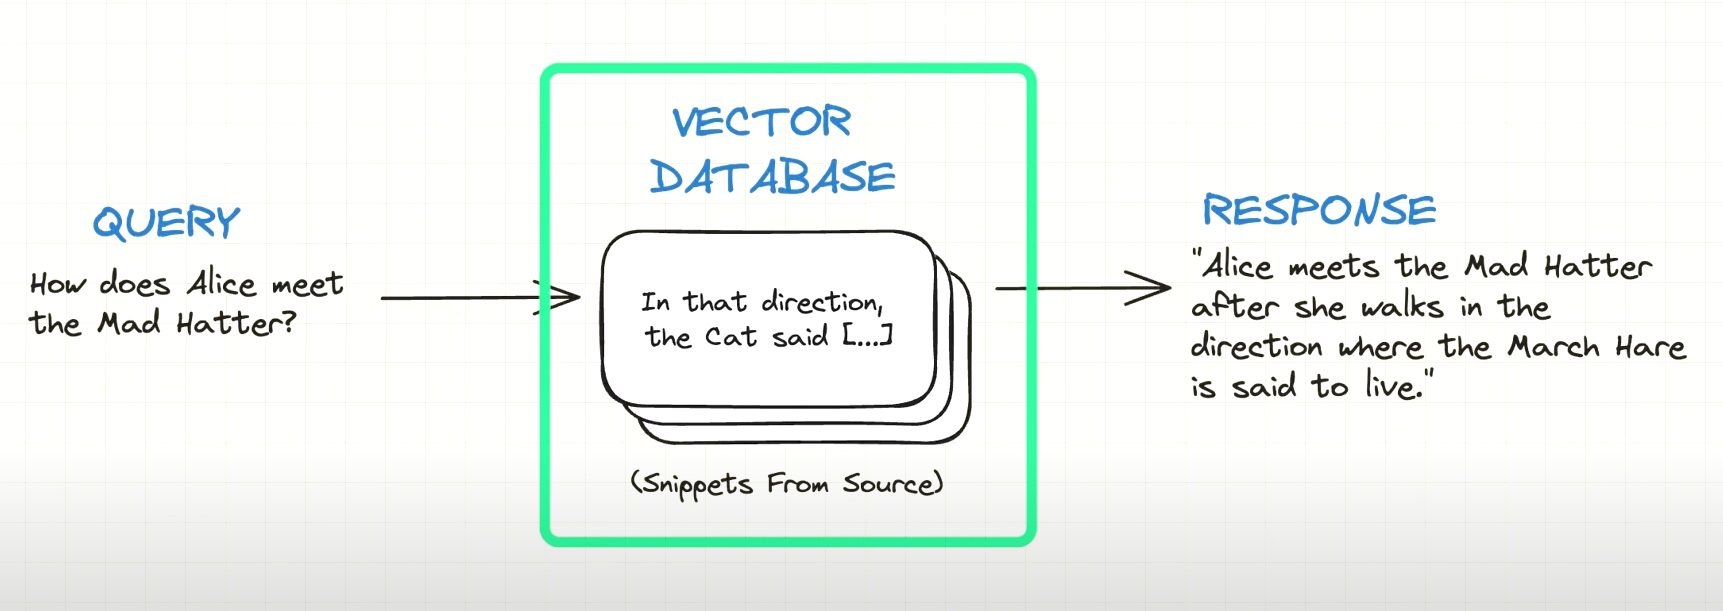

In [ ]:
# QUERYing the relevant data

# find chunks in the database that will most likely contain the answer to the question we wanna ask


# what well do now is use the same embedding function on the all the chunks in our database and find the closest answers via this distance thingy


# what will happen now is that we will find the k closest chunks and feed it to the llm to generate a response



{'score': 0.20247960676081667}

In [ ]:
# LOADING THE CHROMA DATABSE

In [15]:

# preparing the db

embedding_function = OpenAIEmbeddings()

db = Chroma(persist_directory=CHROMA_PATH, embedding_function=embedding_function)



In [16]:
QUERY_TEXT = 'Where was gulliver originally from?'

In [19]:
# SEARCHING THE DB FOR THE CHUNK THAT BEST MATHCES OUR QUERY

results = db.similarity_search_with_relevance_scores(QUERY_TEXT, k=3)

results

[(Document(metadata={'source': 'data/gullivers_travels.md', 'start_index': 359319}, page_content='and consistent as I could; but I thought it necessary to disguise my country, and call myself a Hollander, because my intentions were for Japan, and I knew the Dutch were the only Europeans permitted to enter into that kingdom. I therefore told the officer that having been shipwrecked on the coast of Balnibarbi, and cast on a rock, I was received up into Laputa, or the flying island (of which he had often heard), and was now endeavoring to get to Japan, whence I might find a convenience of returning to my own country. The officer said I must be confined till he could receive orders from court, for which he would write immediately, and hoped to receive an answer in a fortnight. I was carried to a convenient lodging, with a sentry placed at the door; however I had the liberty of a large garden, and was treated with humanity enough, being maintained all the time at the king’s charge. I was vi

In [22]:
if len(results) == 0 or results[0][1] < 0.7:
    print(f'Unable to fetch relevant result')
else:
    i = 0
    for doc, _score in results:
        print(f'{i+1}.\t{doc.page_content}', end='\n\n -------- \n\n')
        i += 1


1.	and consistent as I could; but I thought it necessary to disguise my country, and call myself a Hollander, because my intentions were for Japan, and I knew the Dutch were the only Europeans permitted to enter into that kingdom. I therefore told the officer that having been shipwrecked on the coast of Balnibarbi, and cast on a rock, I was received up into Laputa, or the flying island (of which he had often heard), and was now endeavoring to get to Japan, whence I might find a convenience of returning to my own country. The officer said I must be confined till he could receive orders from court, for which he would write immediately, and hoped to receive an answer in a fortnight. I was carried to a convenient lodging, with a sentry placed at the door; however I had the liberty of a large garden, and was treated with humanity enough, being maintained all the time at the king’s charge. I was visited by several persons, chiefly out of curiosity, because it was reported that I came from

 

In [32]:
# NOW USING AI TO USE THIS INFO AND GIVE RESPONSE

PROMPT_TEMPLATE = """
Answer the question based only on the following context

{context}

---

Answer the question based on the above context : {query}
"""


In [34]:
# getting all the chunks into 1
from langchain_core.prompts.chat import ChatPromptTemplate


context_text = '\n\n---\n\n'.join(doc.page_content for doc, _score in results)

prompt_template = ChatPromptTemplate.from_template(PROMPT_TEMPLATE)

prompt = prompt_template.format(context=context_text, query=QUERY_TEXT)

In [36]:
print(prompt)

Human: 
Answer the question based only on the following context

and consistent as I could; but I thought it necessary to disguise my country, and call myself a Hollander, because my intentions were for Japan, and I knew the Dutch were the only Europeans permitted to enter into that kingdom. I therefore told the officer that having been shipwrecked on the coast of Balnibarbi, and cast on a rock, I was received up into Laputa, or the flying island (of which he had often heard), and was now endeavoring to get to Japan, whence I might find a convenience of returning to my own country. The officer said I must be confined till he could receive orders from court, for which he would write immediately, and hoped to receive an answer in a fortnight. I was carried to a convenient lodging, with a sentry placed at the door; however I had the liberty of a large garden, and was treated with humanity enough, being maintained all the time at the king’s charge. I was visited by several persons, chiefly